<a href="https://colab.research.google.com/github/anjuli0802/OIBSIP-TASK_4_EMAIL_SPAM_DETECTION_WITH_MACHINE_LEARNING/blob/main/emailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dependencies

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Collection

In [224]:
email_data = pd.read_csv("/content/spam[1].csv", encoding = "latin-1")

##Data Pre-Processing

In [225]:
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [226]:
email_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [227]:
email_data.shape

(5572, 5)

In [228]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##evaluation of Missing Values

In [229]:
email_data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [230]:
email_data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

##Handling the Missing Values

In [232]:
email_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)

In [233]:
email_data.isna().sum()

v1    0
v2    0
dtype: int64

##Renaming the Column Names

In [234]:
email_data.rename(columns = {'v1' : 'Type', 'v2' : 'Mail'}, inplace = True)

In [235]:
email_data.head()

,Type,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##Data Visualization

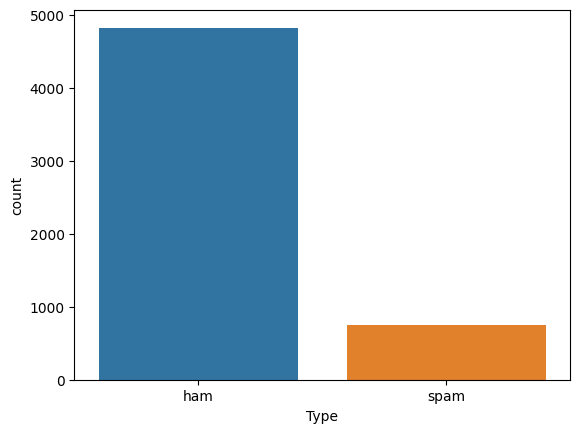

In [236]:
sns.countplot(x = 'Type', data = email_data);

##Encoding

In [237]:
email_data['Type'].replace(to_replace = 'spam', value = 0, inplace = True)

In [238]:
email_data['Type'].replace(to_replace = 'ham', value = 1, inplace = True)

In [239]:
email_data['Type'].value_counts()

1    4825
0     747
Name: Type, dtype: int64

##Splitting the data into Training and Testing data

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
y = email_data['Type']
x = email_data['Mail']

In [242]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Mail, Length: 5572, dtype: object

In [243]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Type, Length: 5572, dtype: int64

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##Performing Feature Extraction on categorical data

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [246]:
feature_extraction = TfidfVectorizer(stop_words = 'english', lowercase = True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [247]:
x_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Mail, Length: 4457, dtype: object

In [248]:
print(x_train_features)

  (0, 4520)	0.4658046386365619
  (0, 3210)	0.348722265231364
  (0, 7415)	0.348722265231364
  (0, 1706)	0.3431839629173582
  (0, 4416)	0.4528381701109944
  (0, 1371)	0.4658046386365619
  (1, 0)	0.2654936554684193
  (1, 1649)	0.3059746053542906
  (1, 6440)	0.2953742837684993
  (1, 4533)	0.3059746053542906
  (1, 419)	0.28715203556385105
  (1, 4292)	0.2953742837684993
  (1, 5005)	0.1937920260229529
  (1, 2661)	0.3059746053542906
  (1, 1533)	0.2015782058421696
  (1, 6296)	0.269833648032668
  (1, 3631)	0.2804339696184593
  (1, 3140)	0.3059746053542906
  (1, 1187)	0.26161139982801973
  (2, 2190)	0.5102109014477275
  (2, 5351)	0.5102109014477275
  (2, 1674)	0.35156722029872034
  (2, 5770)	0.3962151014046925
  (2, 3061)	0.44585171875646595
  (3, 5484)	0.4829129976175997
  :	:
  (4451, 5740)	0.3358090891373877
  (4451, 4686)	0.3478605253385091
  (4452, 3402)	0.4536077050510107
  (4452, 3423)	0.4833413012939851
  (4452, 1579)	0.3576443319642905
  (4452, 1781)	0.3311324953642251
  (4452, 5998)	0.3

##Model Training

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
model = LogisticRegression()

In [251]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [252]:
train_pred = model.predict(x_train_features)

In [253]:
test_pred = model.predict(x_test_features)

##Accuracy score

In [254]:
from sklearn.metrics import accuracy_score

In [255]:
train_as = accuracy_score(y_train, train_pred)
train_as

0.9694862014808167

In [256]:
test_as = accuracy_score(y_test, test_pred)
test_as

0.9524663677130045

##User Interface

In [261]:
def get_user_msg():
    return [input("Enter your message: ")]

if __name__ == "__main__":
    while True:
        mail = get_user_msg()
        ip_features = feature_extraction.transform(mail)

        prediction = model.predict(ip_features)

        print(prediction)

        if prediction[0] == 0:
            print("Spam ")
        else:
            print("Not Spam ")
            break


#mails to check the working of the model
#URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
#As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

Enter your message: URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
[0]
Spam 
Enter your message: As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
[1]
Not Spam 
